In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


mush_data = pd.read_csv('E:/Github_dir/data_analysis_py/Mushroom Classification/mushrooms.csv')
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [469]:
for i in mush_data.columns:
    print ('ATTR --- '+ i)
    print (mush_data[i].value_counts())
    print ('\n')

ATTR --- class
e    4208
p    3916
Name: class, dtype: int64


ATTR --- cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


ATTR --- cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


ATTR --- cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


ATTR --- bruises
f    4748
t    3376
Name: bruises, dtype: int64


ATTR --- odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


ATTR --- gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64


ATTR --- gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64


ATTR --- gill-size
b    5612
n    2512
Name: gill-size, dtype: int64


ATTR --- gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-

In [470]:
mush_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [471]:
#Check for Nan or null values
mush_data.apply(lambda x: sum(x.isnull()))

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

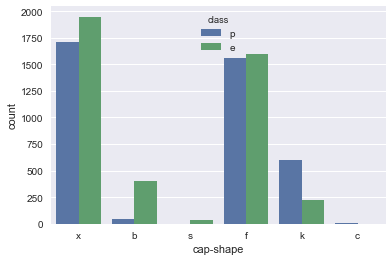

In [472]:
sns.countplot('cap-shape',data=mush_data,hue='class')

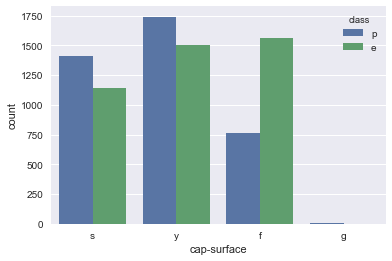

In [473]:
sns.countplot('cap-surface',data=mush_data,hue='class')

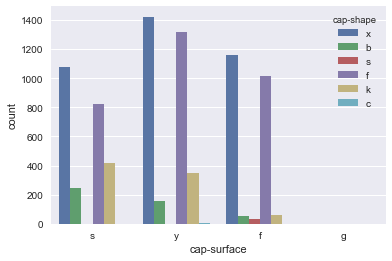

In [474]:
sns.countplot('cap-surface',data=mush_data,hue='cap-shape')

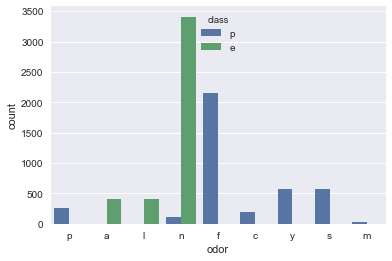

In [475]:
sns.countplot('odor',data=mush_data,hue='class')


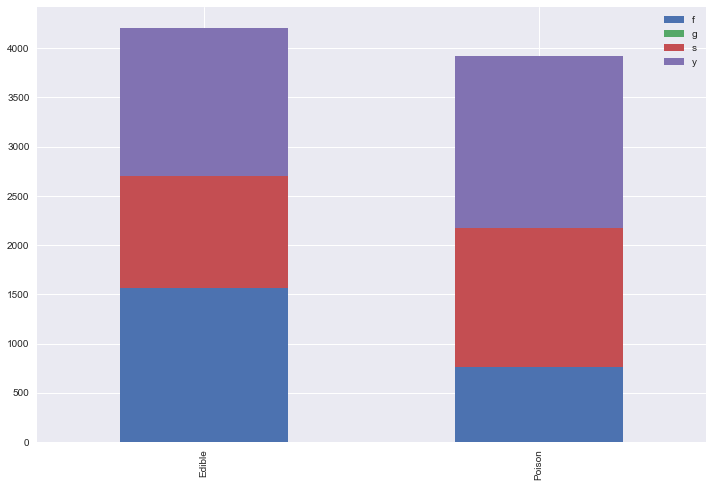

In [476]:
edible=mush_data[mush_data['class']=='e']['cap-surface'].value_counts()
poison = mush_data[mush_data['class']=='p']['cap-surface'].value_counts()

ff = pd.DataFrame([edible,poison])
ff.index=['Edible','Poison']
ff.plot(kind='bar',stacked=True,figsize=(12,8))

In [477]:
# let's convert the data into dummy format

def make_dummy(data,attr):
    dummy = pd.get_dummies(data[attr],prefix=attr)
    data = pd.concat([data,dummy],axis=1)
    data.drop(attr,axis=1,inplace=True)
    return data

In [478]:
data_temp = mush_data.drop('class',axis=1)
cols = data_temp.columns
for attr in cols:
    mush_data = make_dummy(mush_data,attr)   

In [479]:
mush_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [480]:
X = mush_data.iloc[:,1:]
Y = mush_data.iloc[:,0]

In [481]:
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

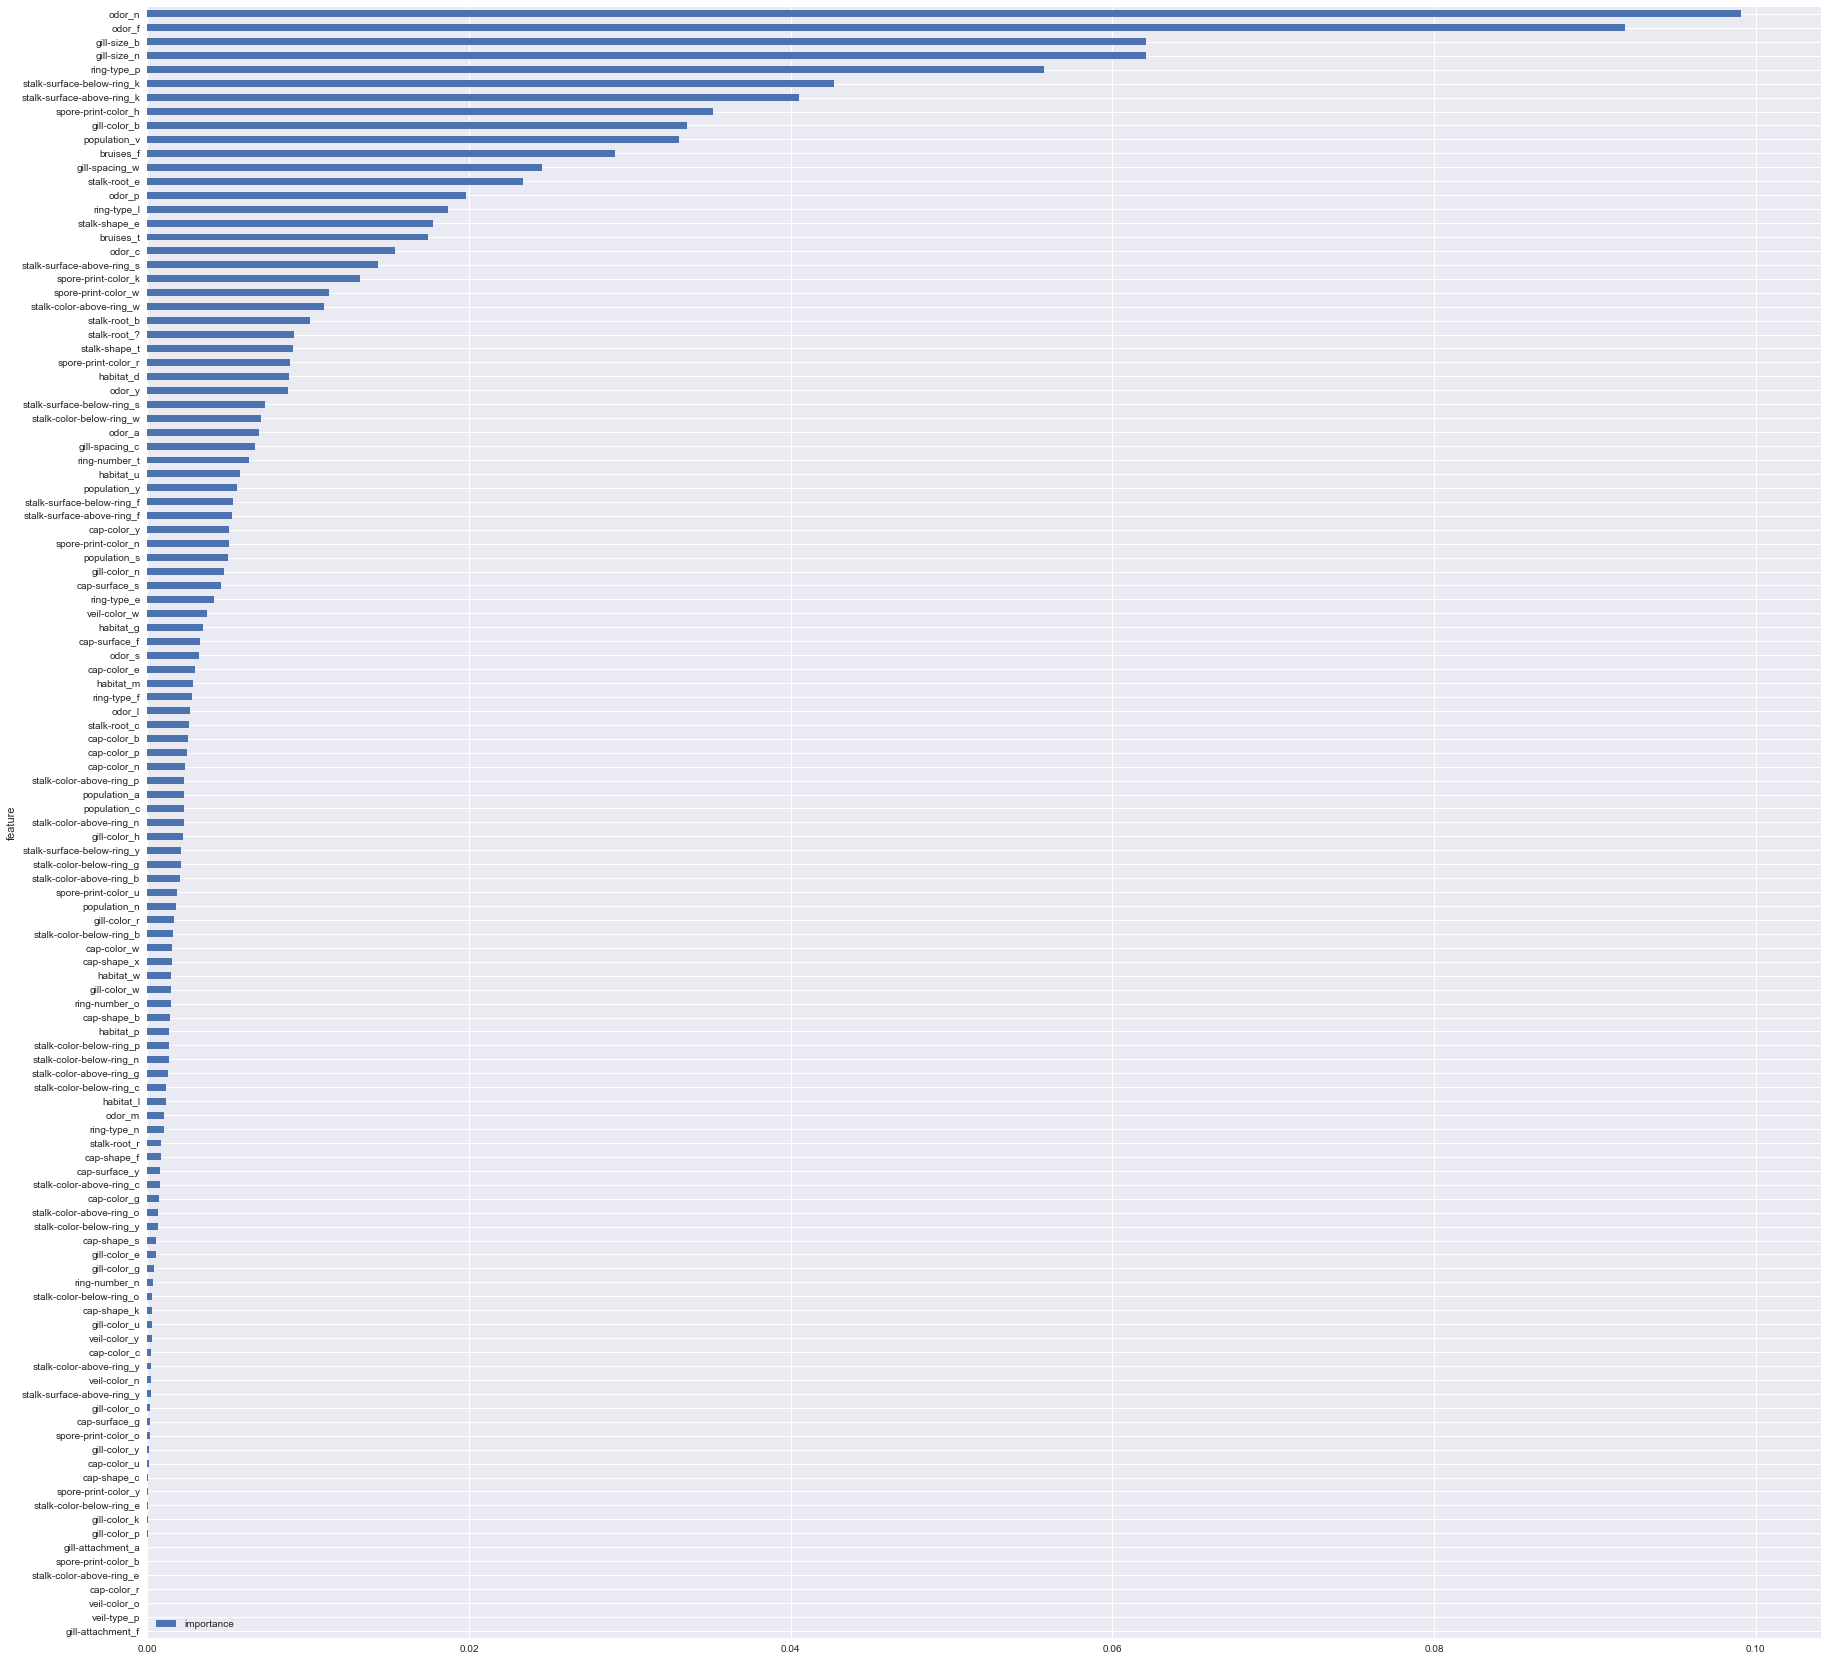

In [482]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf.fit(X,Y)

features = pd.DataFrame(dtype='object')
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(30, 30))

In [483]:
# we can see that many features in the last part have zero importanxce 
# so we have to reduce the features to make data functionality faster
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X)
train_reduced.shape

(8124, 28)

In [484]:
# we can see the important features reduced mush
#import necessary library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring = 'accuracy'
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [485]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': ['sqrt', 'auto', 'log2'],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(Y, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, Y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9743968488429345
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10, 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)

In [486]:
model_ = grid_search.best_estimator_
model_.fit(X, Y)

xval = cross_val_score(model_, X,Y, cv = 10, scoring='accuracy')
np.mean(xval)

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


0.96727863949416315

In [487]:
random_forest = grid_search.best_estimator_
Y_pred = random_forest.predict(X_test)

In [488]:
submission = pd.DataFrame({
        "class": Y_pred
    })

submission.to_csv("mushroom_final.csv",index=False, encoding='utf-8')

In [489]:
submission.head()

,class
0,p
1,p
2,e
3,e
4,e
